# 第7章 : 分布と相関、ディストリビューション・リレーショナルプロット

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ペンギンズのデータセット読み込み

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('penguins')
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

billはくちばし、flipperは翼、mmはミリメートル、gはグラム

In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# 欠損をもつレコード削除
df.dropna(axis=0, inplace=True)

In [7]:
df.shape

(333, 7)

In [8]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## ディストリビューションプロット

In [10]:
# Seabornテーマ設定
sns.set_theme(context='talk', style='darkgrid', font='MS Mincho')

### ヒストプロット

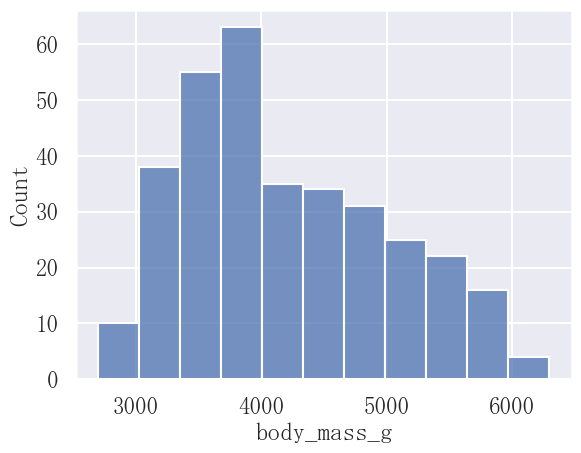

In [11]:
sns.histplot(data=df, x='body_mass_g')
plt.show()

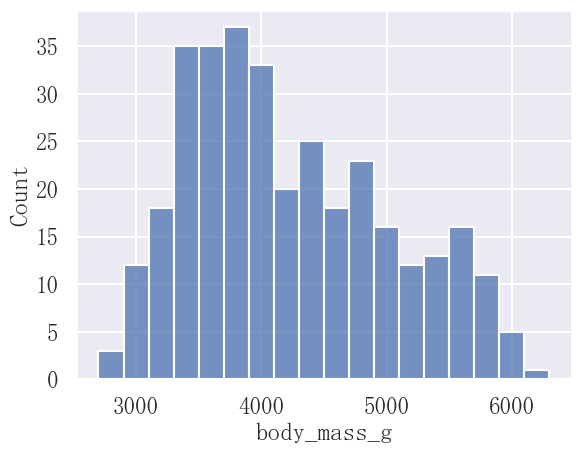

In [12]:
sns.histplot(data=df, x='body_mass_g', bins=18)
plt.show()

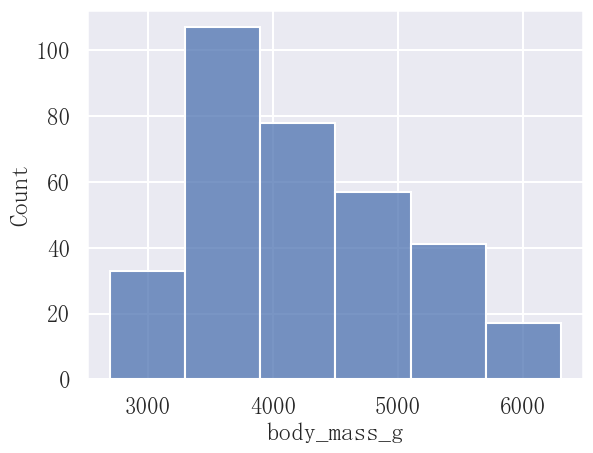

In [13]:
sns.histplot(data=df, x='body_mass_g', bins=6)
plt.show()

### hueの利用

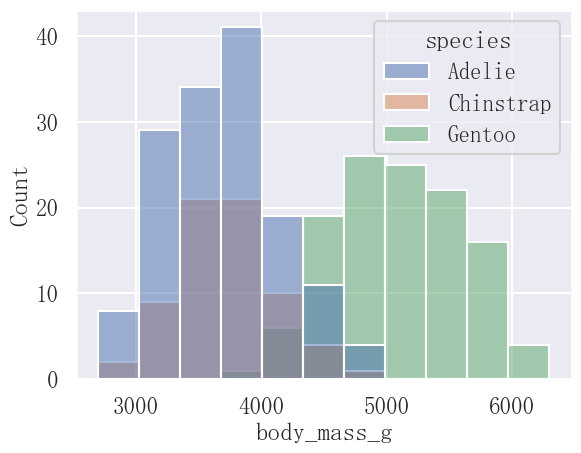

In [14]:
sns.histplot(data=df, x='body_mass_g', hue='species')
plt.show()

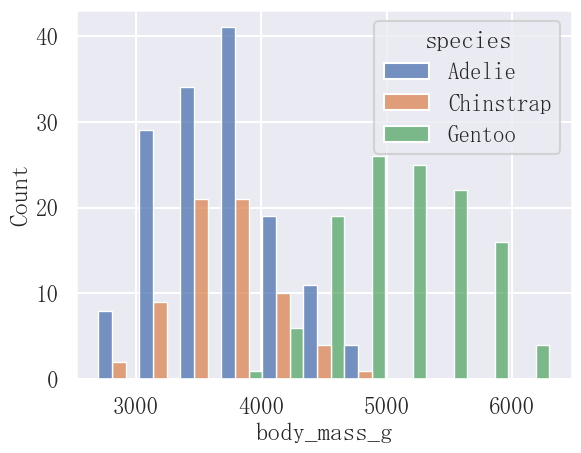

In [15]:
# binを分割
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge')
plt.show()

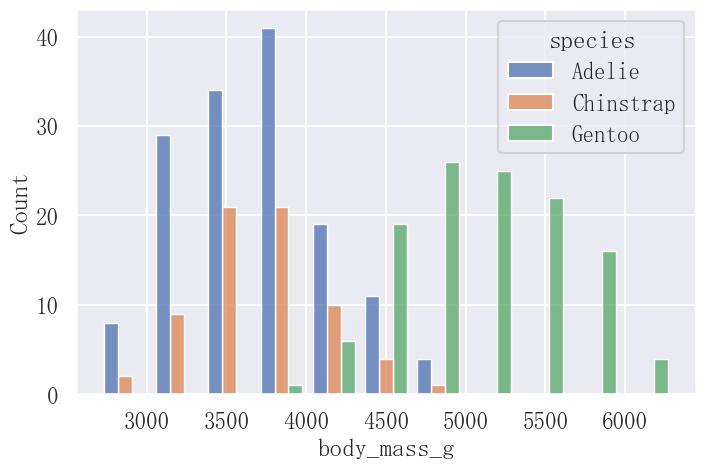

In [16]:
# サイズ調整
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge', shrink=0.8)
plt.show()

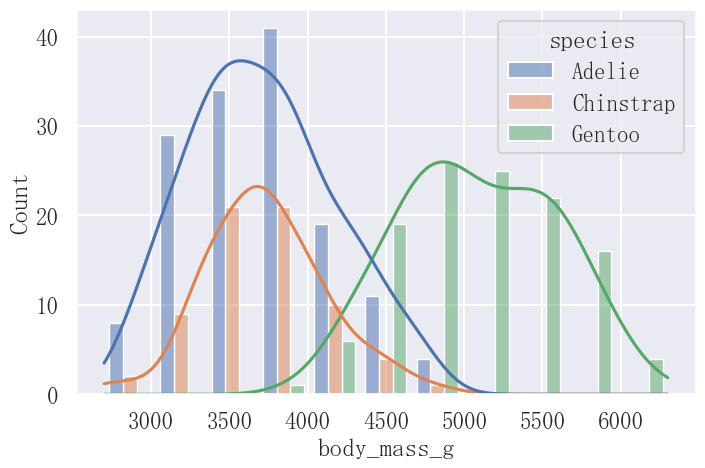

In [17]:
# KDE表示(Kernel Density Estimation : カーネル密度推定)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='dodge', shrink=0.8, kde=True)
plt.show()

multipleをいろいろ変更していく

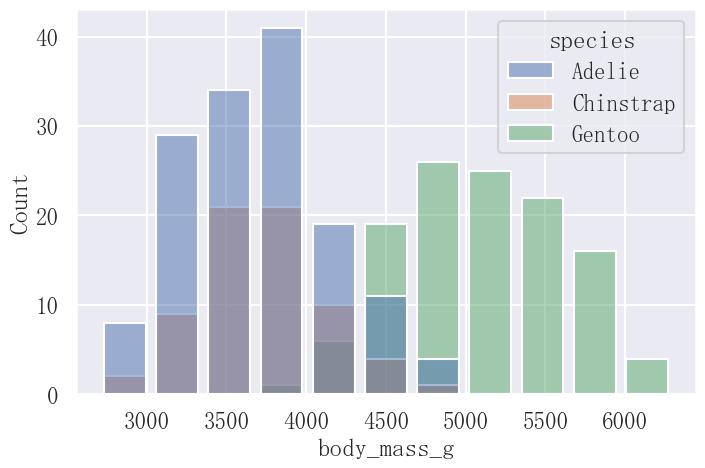

In [18]:
# multiple : layer (デフォルト)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='layer', shrink=0.8)
plt.show()

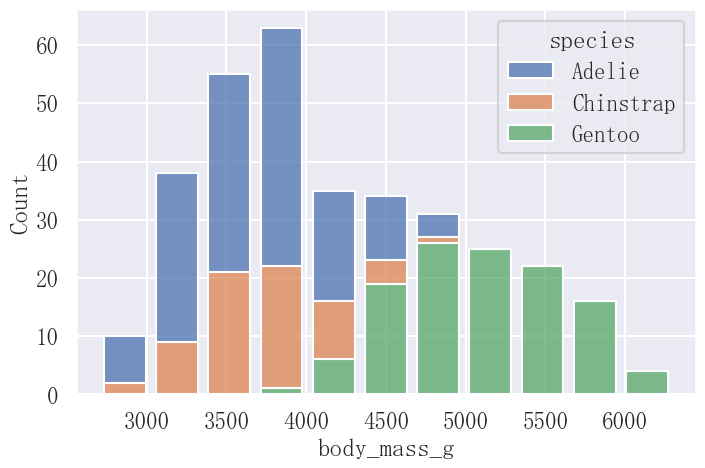

In [19]:
# multiple : stack (積み上げ)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='stack', shrink=0.8)
plt.show()

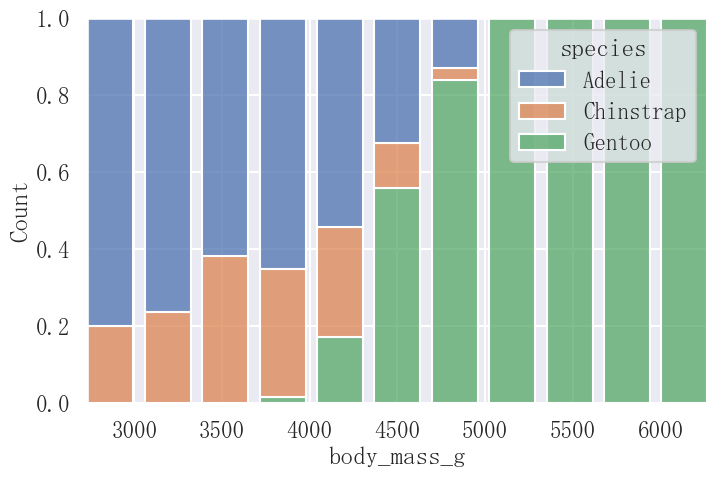

In [20]:
# multiple : fill (全数を1としてそれぞれの割合を表示)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='body_mass_g', hue='species', multiple='fill', shrink=0.8)
plt.show()

## リレーショナルプロット

### ジョイントプロット
スキャタープロット(散布図)とヒストプロットが同時に表示される

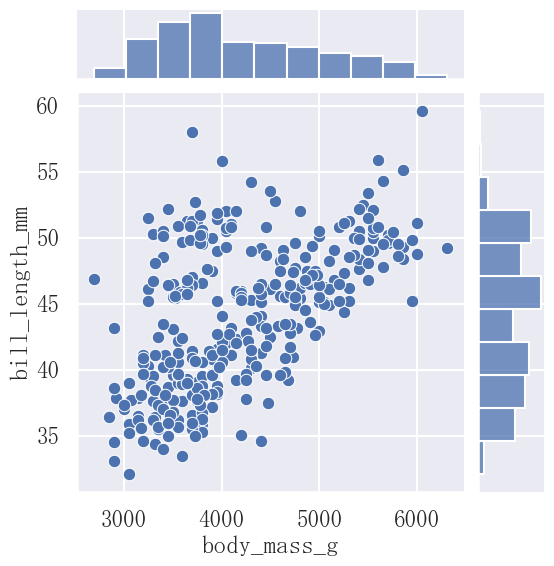

In [21]:
# 体重とくちばしの長さの関係
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm')

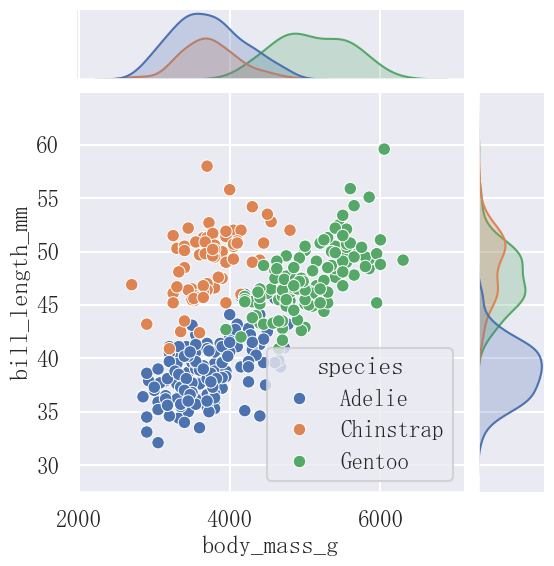

In [22]:
# hueの利用
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm', hue='species')
plt.show()

### スキャタープロット
散布図のこと

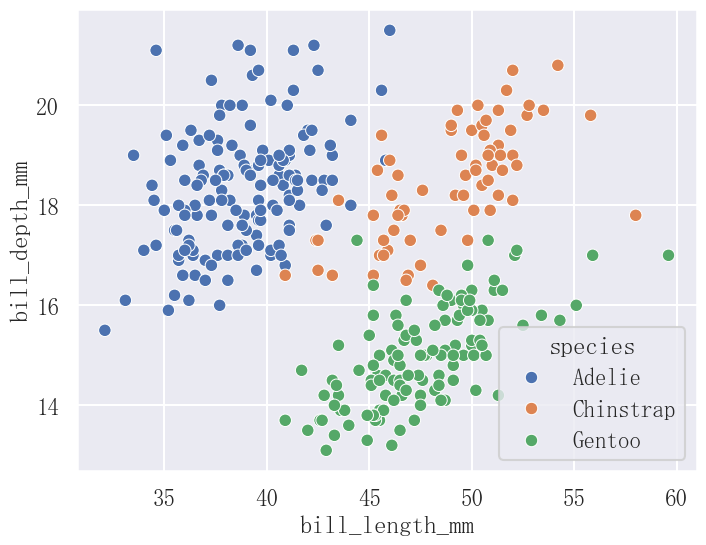

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

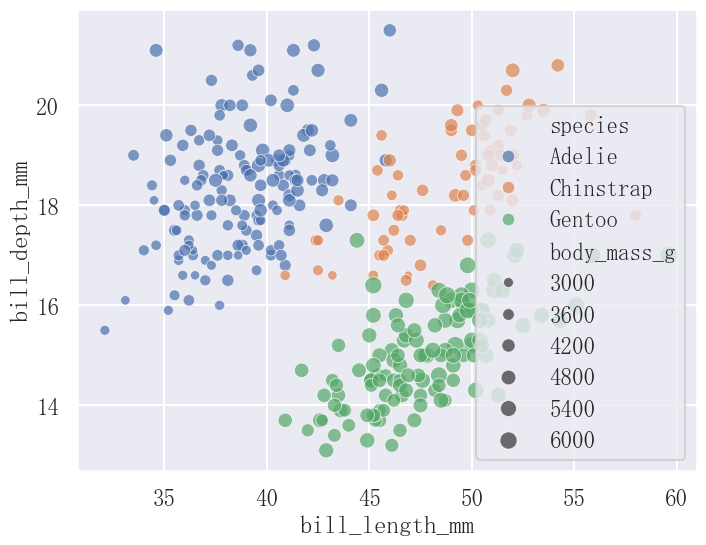

In [24]:
# alphaで透明度を設定できる
# 各プロットのサイズをsizeで設定できる(ここでは体重とする)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', alpha=0.7, size='body_mass_g')
plt.show()

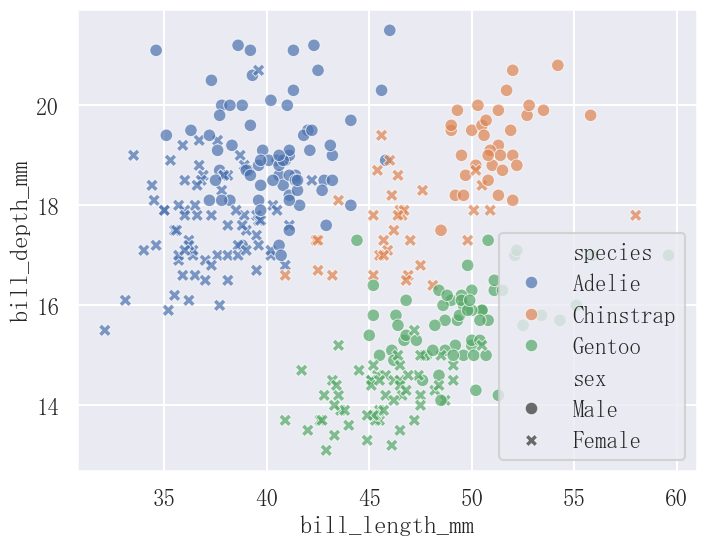

In [25]:
# styleを指定することでマーカーの違いによる可視化ができる(ここでは性別で分類してみる)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', alpha=0.7)
plt.show()

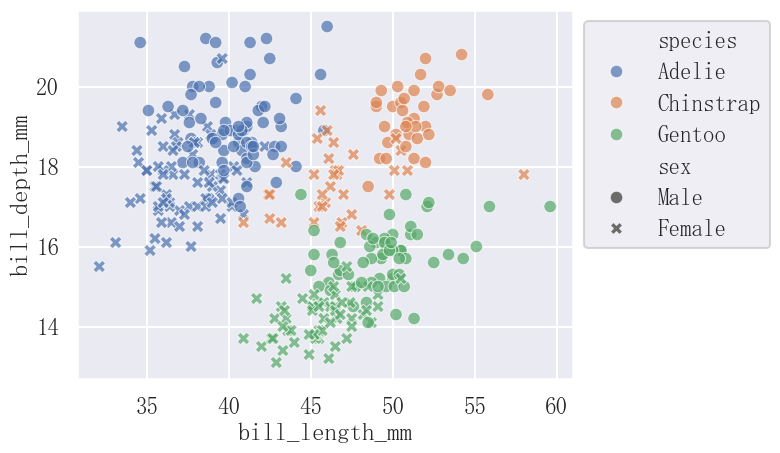

In [26]:
# legendの位置を変更してプロットをすべて見えるようにする
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex', alpha=0.7)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## RELプロット(リレーショナルプロット)

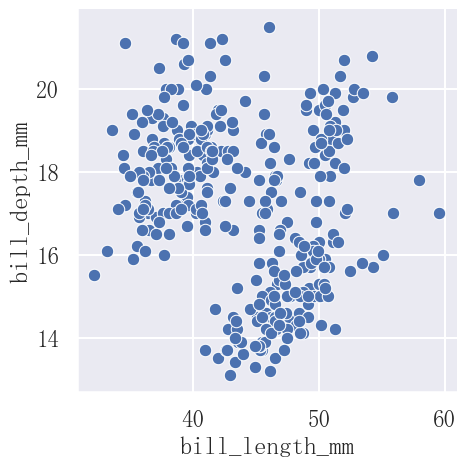

In [27]:
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm')
plt.show()

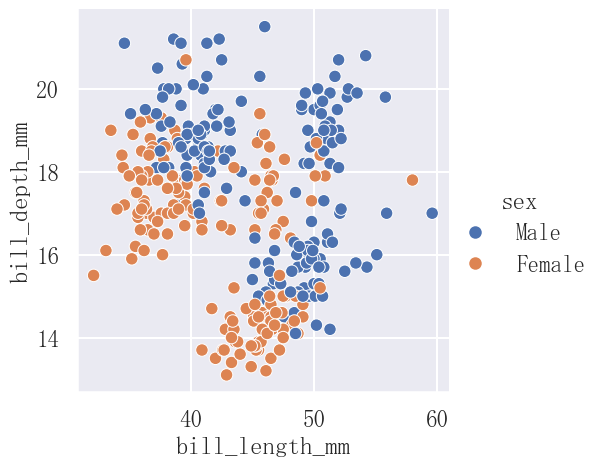

In [28]:
# hueの追加
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex')
plt.show()

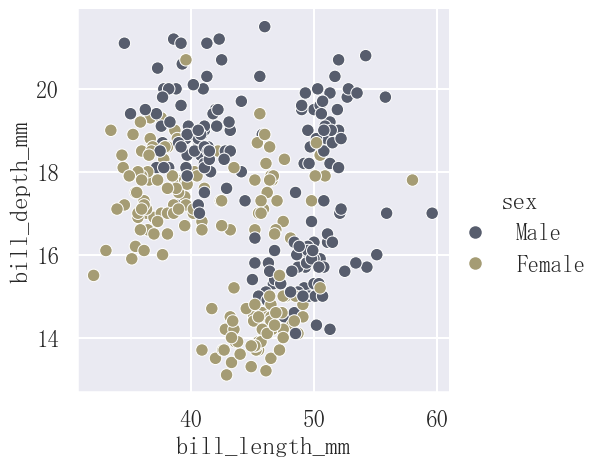

In [29]:
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis')
plt.show()

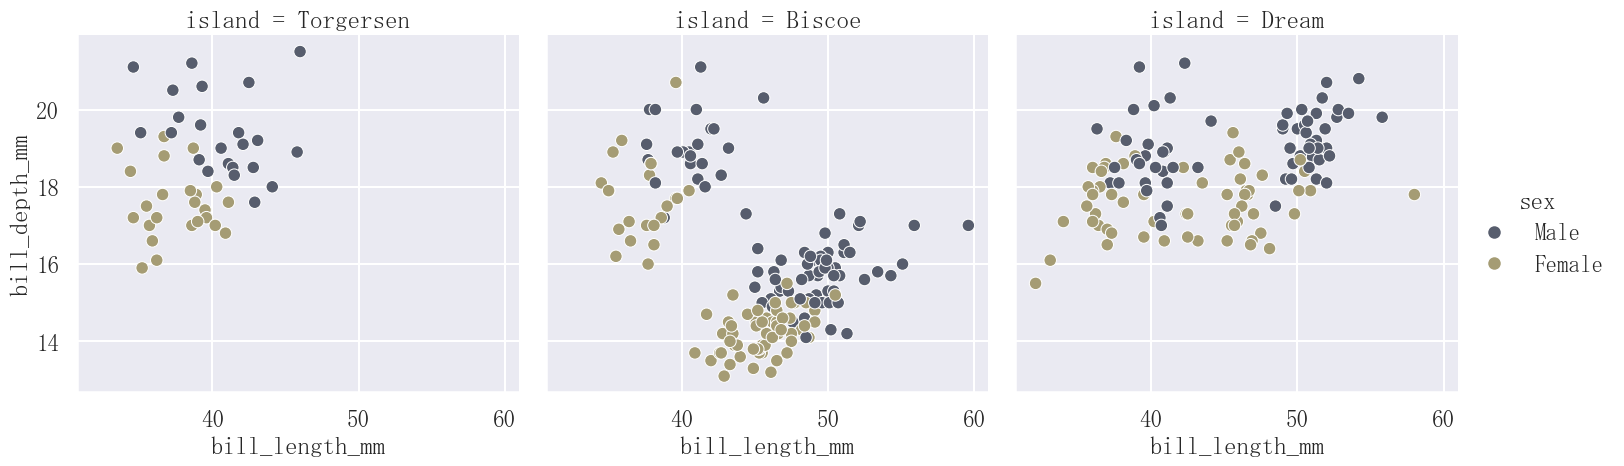

In [30]:
# RELプロットではcolumnとrowを指定可能
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis', col='island')
plt.show()

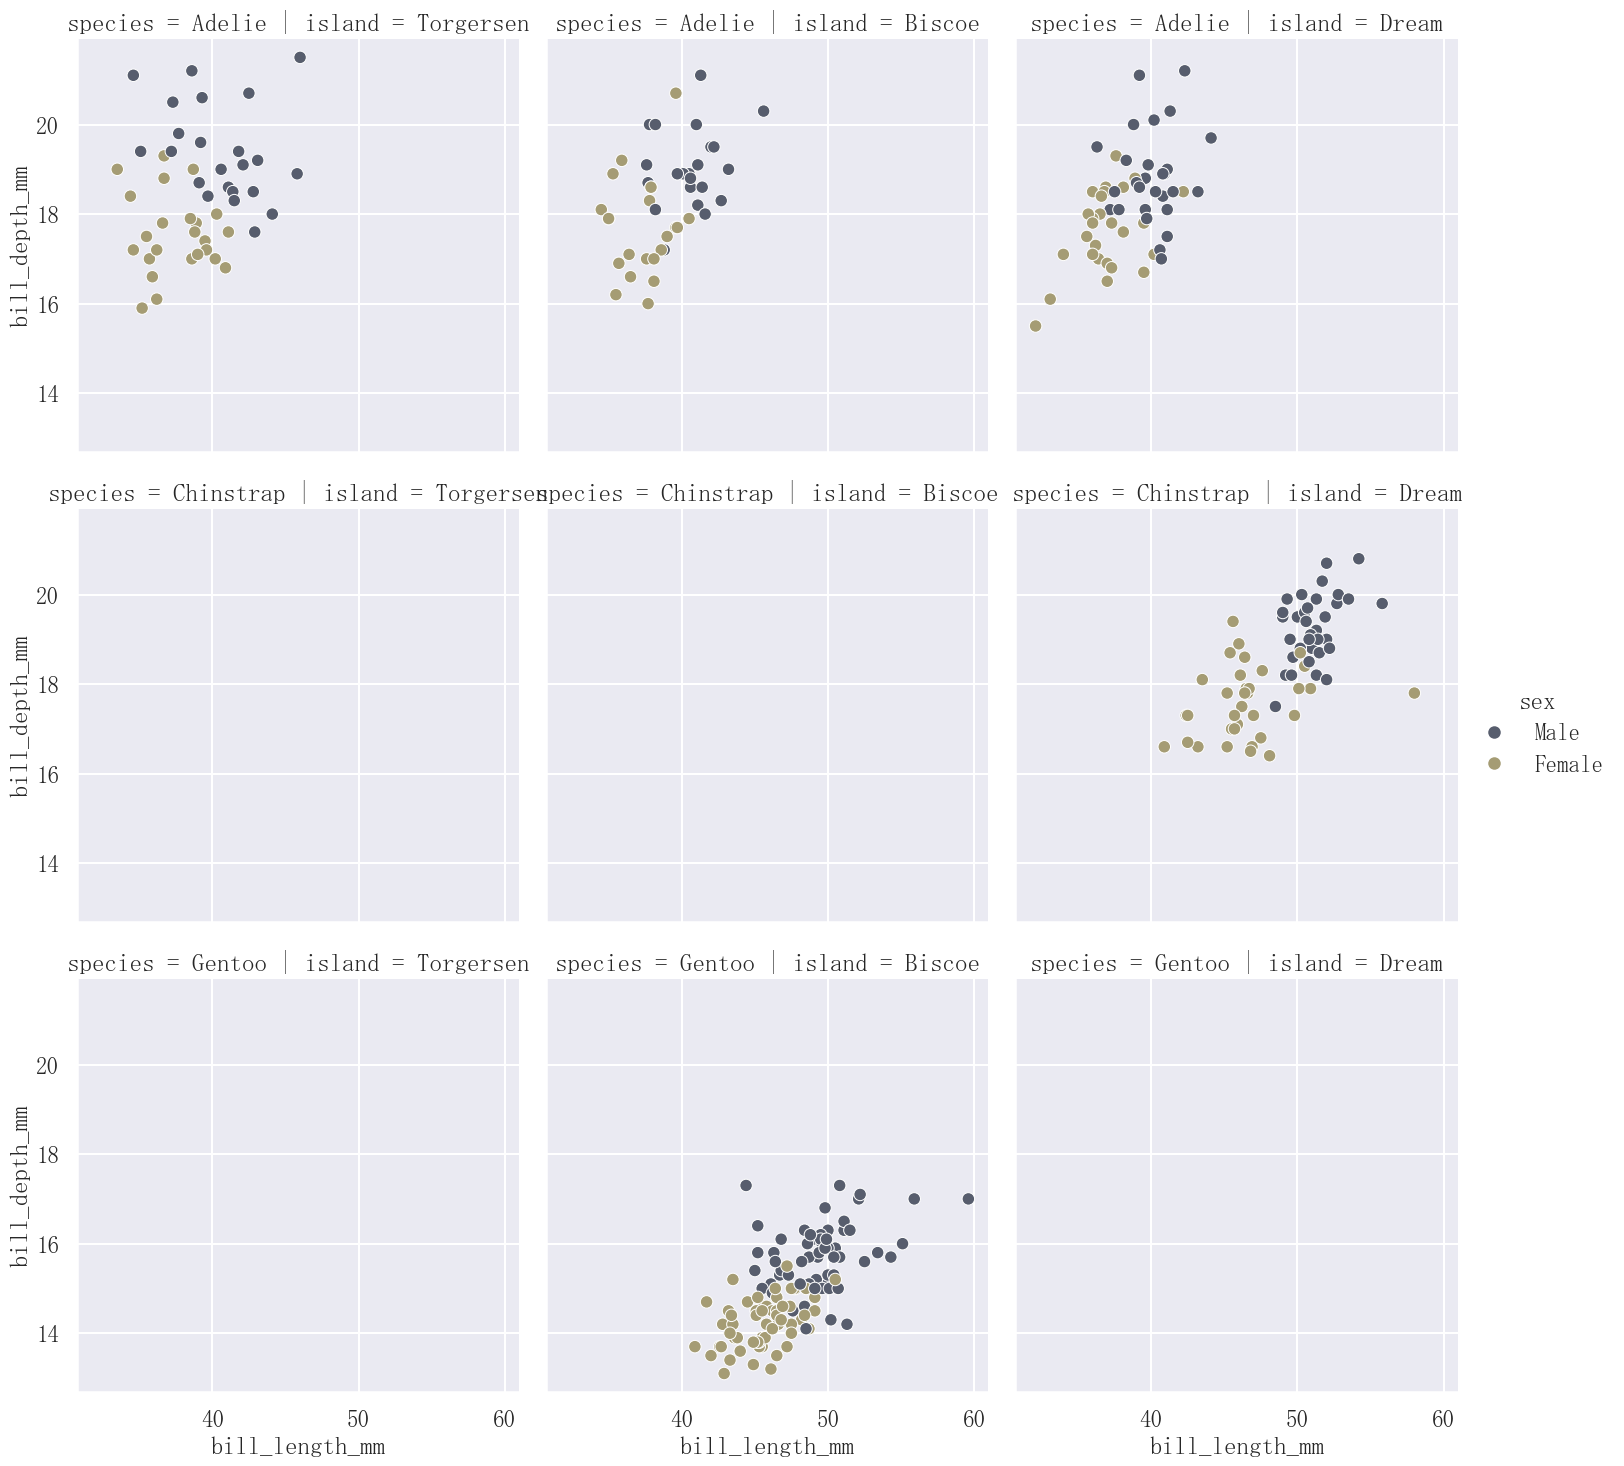

In [31]:
# RELプロットではcolumnとrowを指定可能
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex', palette='cividis', col='island', row='species')
plt.show()

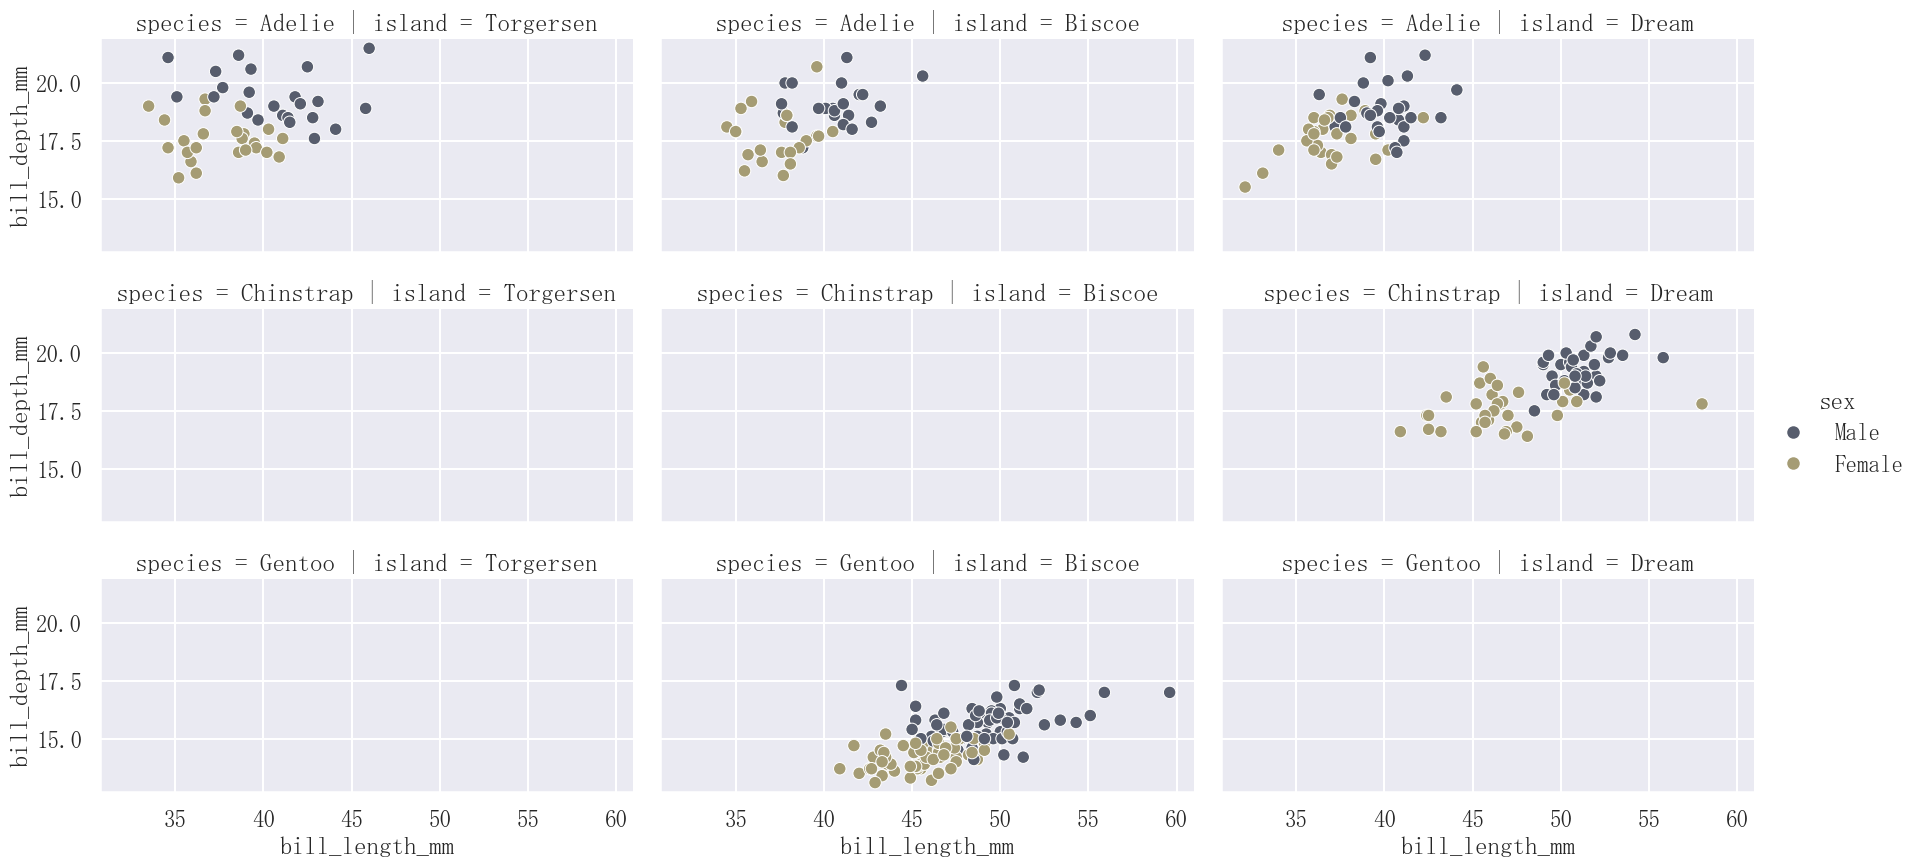

In [32]:
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex',
    palette='cividis', col='island', row='species', height=3, aspect=2)
plt.show()

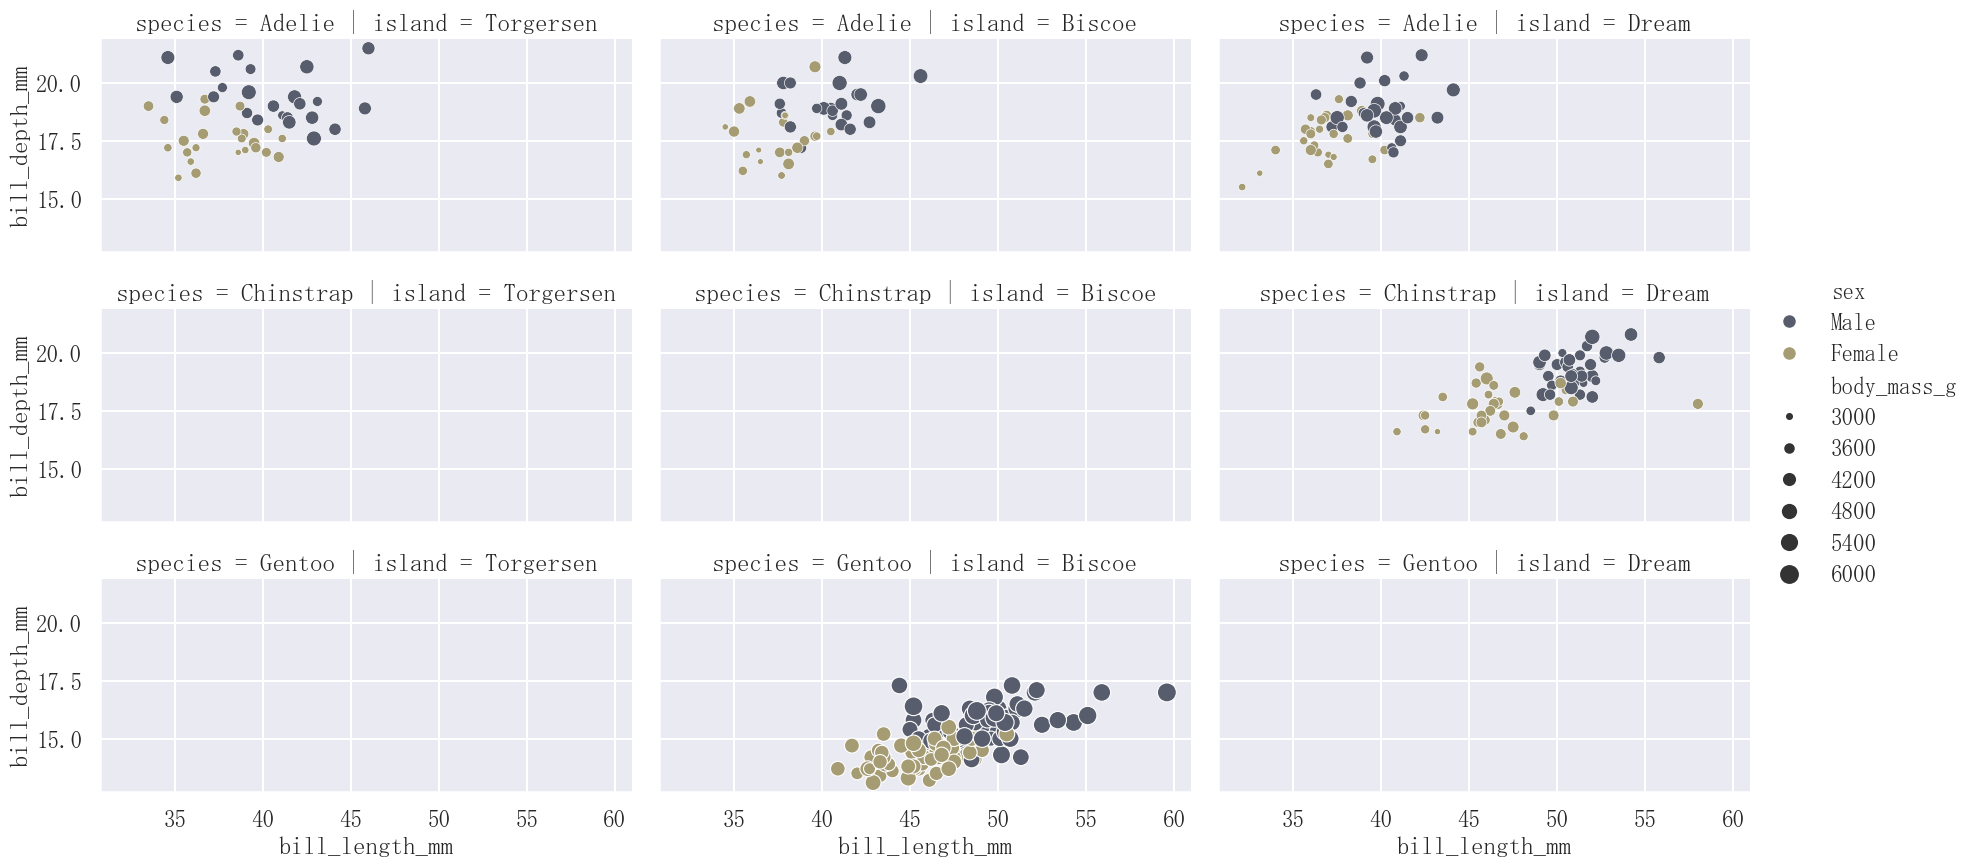

In [33]:
# sizeを指定
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex',
    palette='cividis', col='island', row='species', size='body_mass_g', sizes=(10, 200), height=3, aspect=2)
plt.show()

## ペアプロット

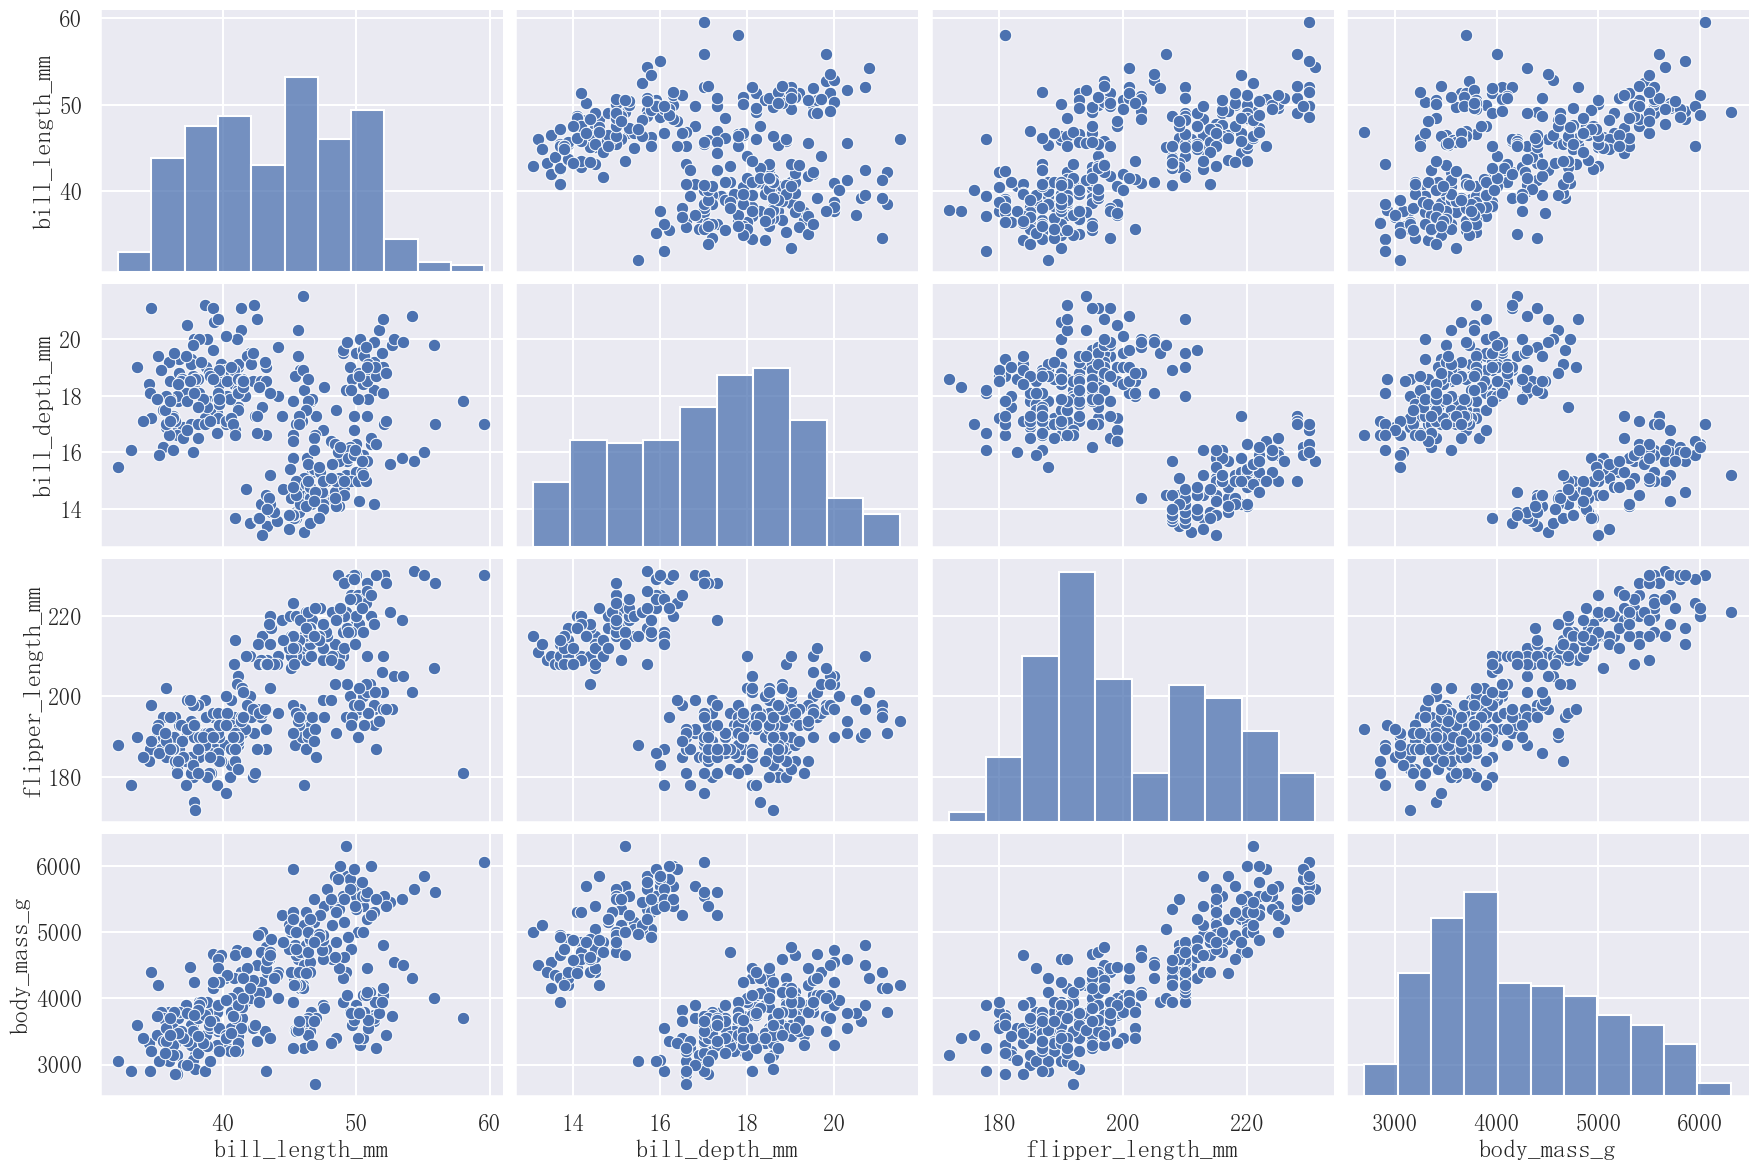

In [35]:
sns.pairplot(data=df, height=3, aspect=1.5)
plt.show()

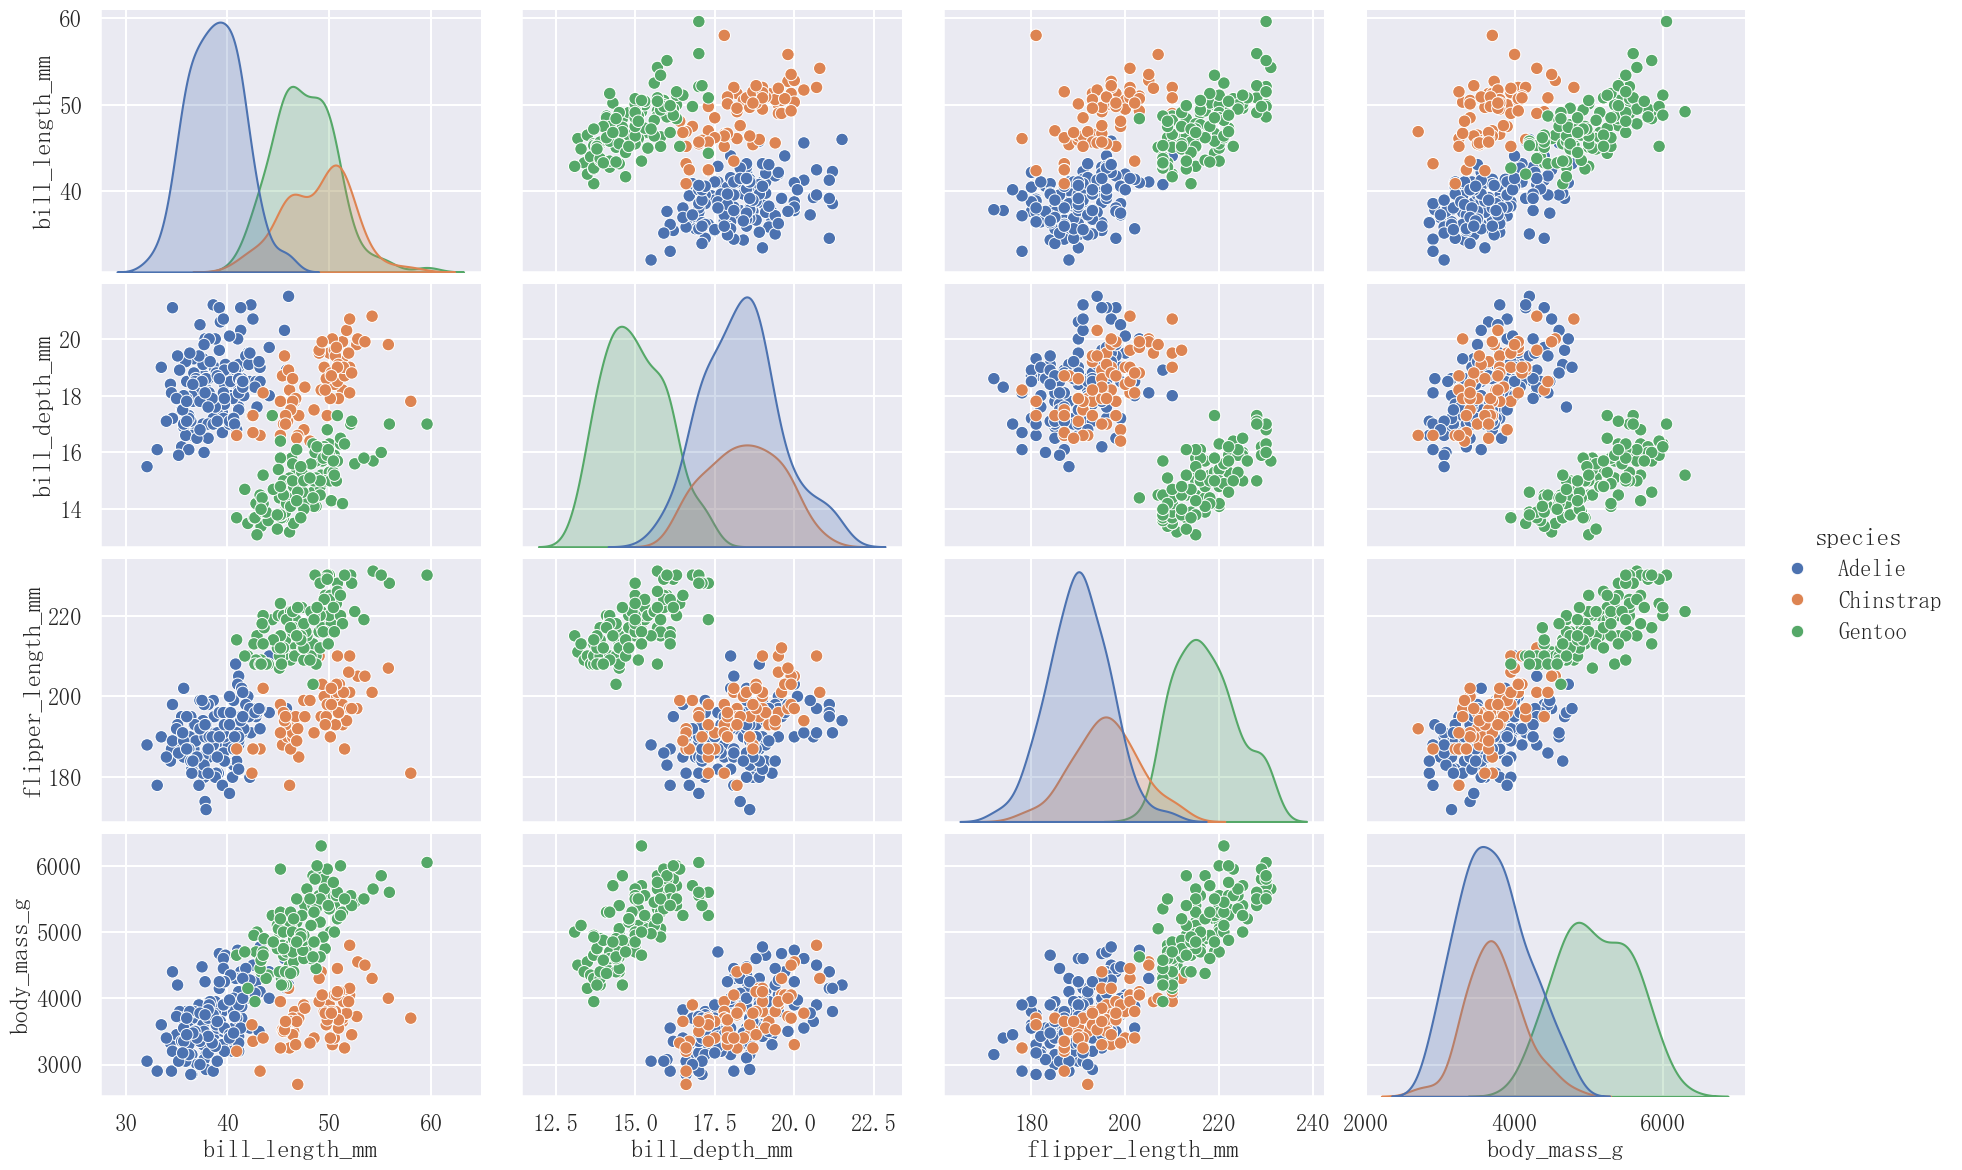

In [36]:
# hueを指定すると対角線上がKDEになる
sns.pairplot(data=df, hue='species', height=3, aspect=1.5)
plt.show()

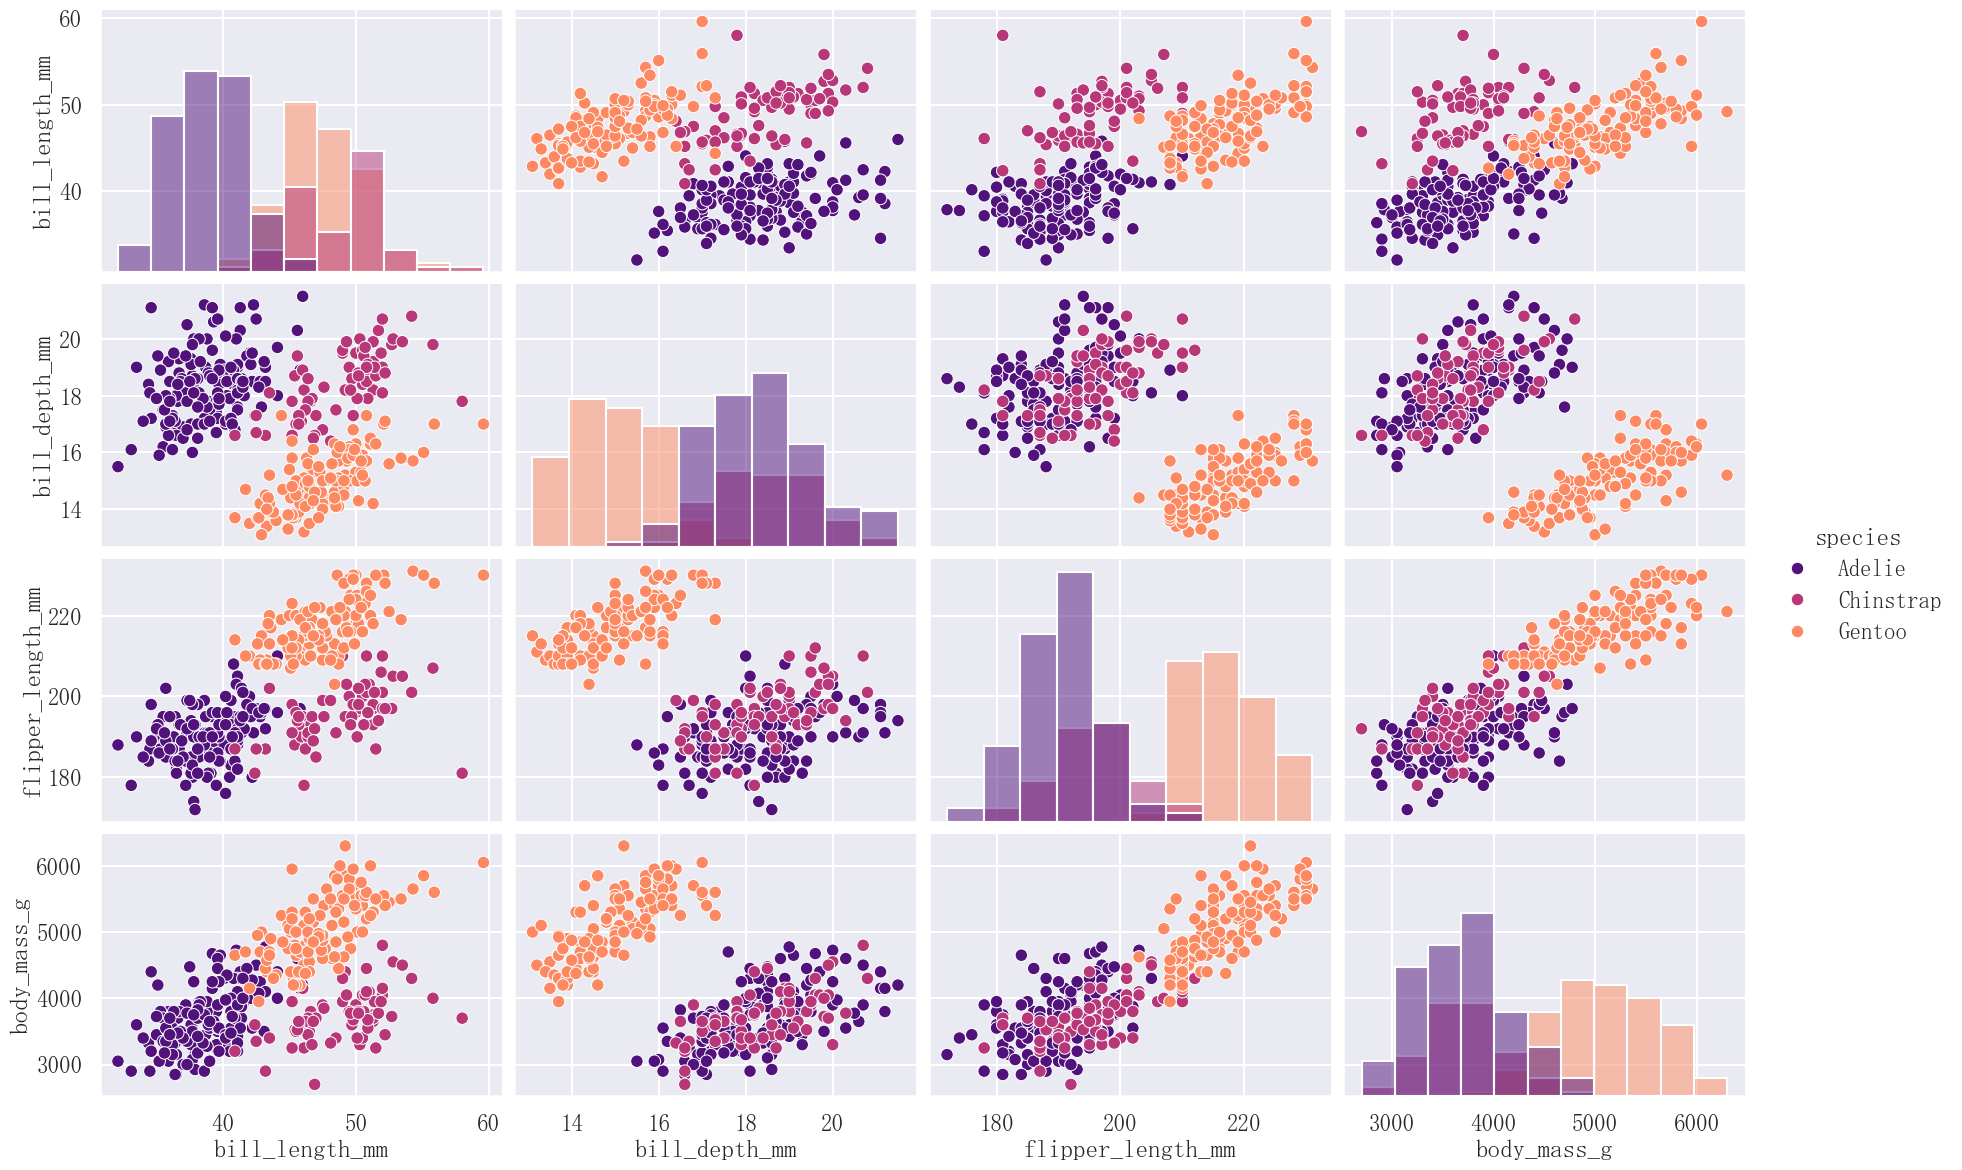

In [37]:
sns.pairplot(data=df, hue='species', palette='magma', diag_kind='hist', height=3, aspect=1.5)
plt.show()

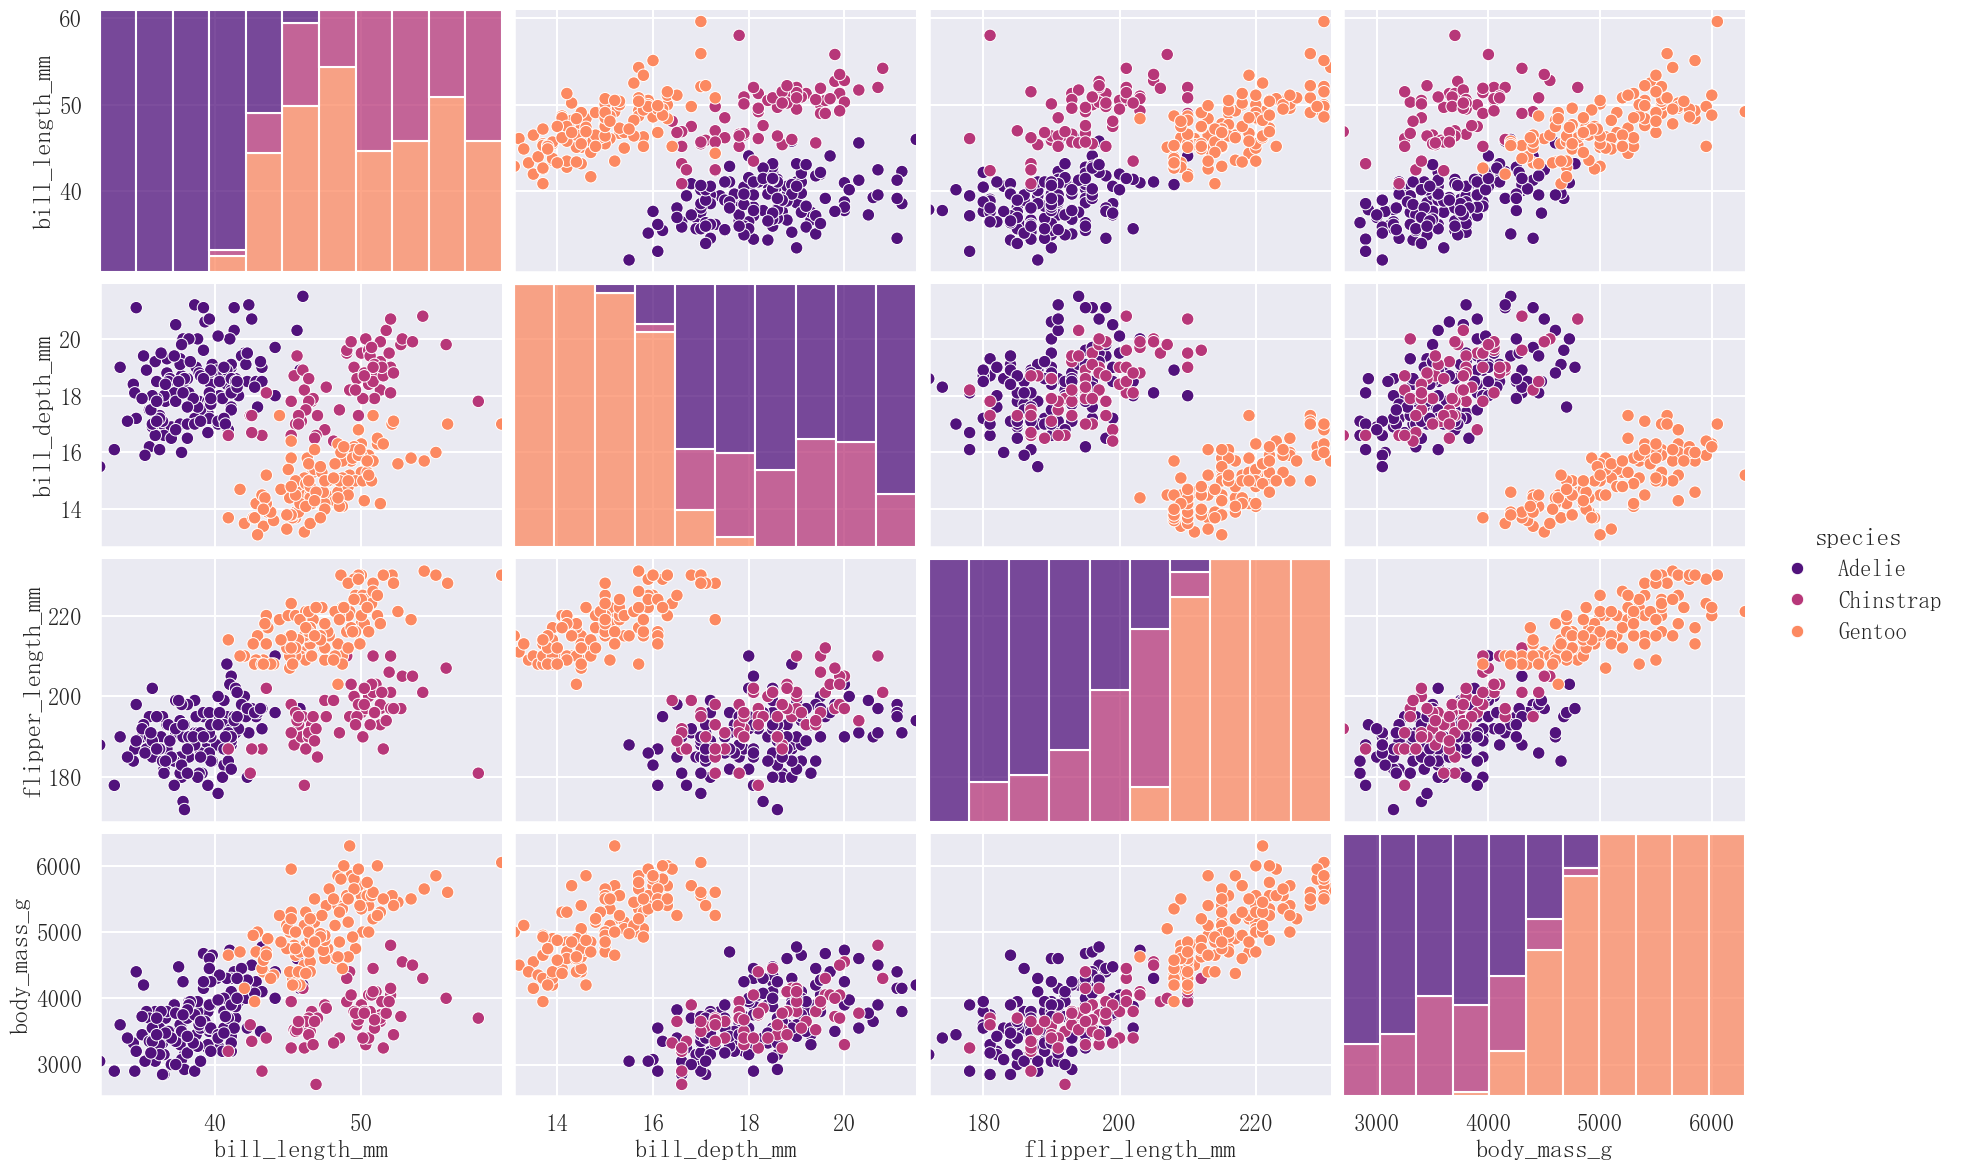

In [40]:
sns.pairplot(data=df, hue='species', palette='magma', diag_kind='hist',
    height=3, aspect=1.5, diag_kws={'multiple': 'fill'})
plt.show()

## regプロット
regression

In [43]:
adelie = df.groupby('species').get_group('Adelie')
chinstrap = df.groupby('species').get_group('Chinstrap')
gentoo = df.groupby('species').get_group('Gentoo')

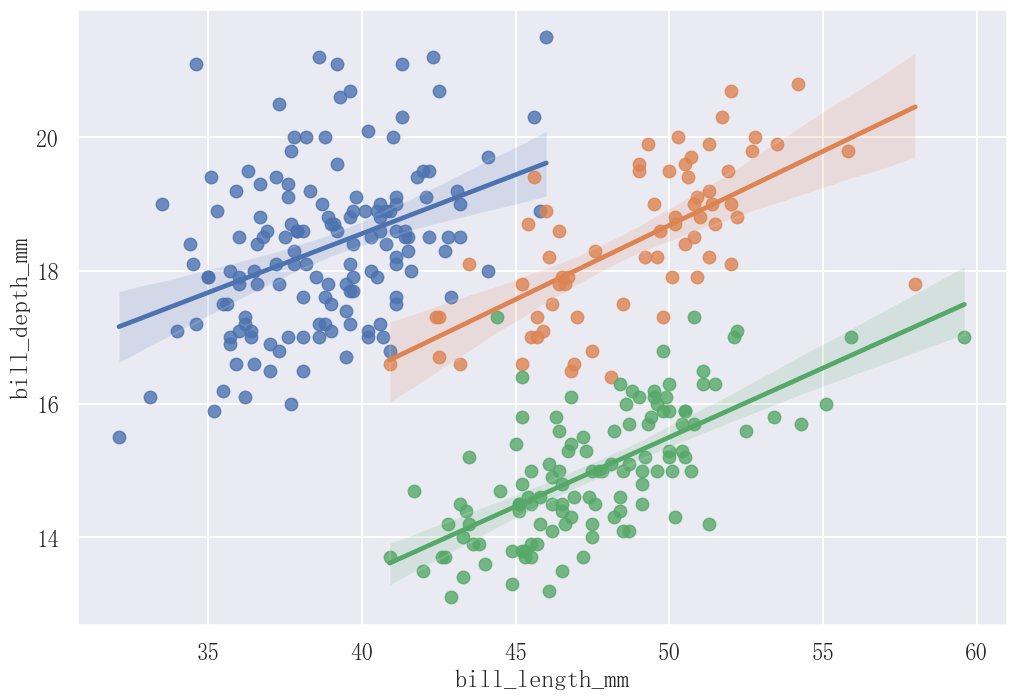

In [48]:
plt.figure(figsize=(12, 8))
sns.regplot(data=adelie, x='bill_length_mm', y='bill_depth_mm')
sns.regplot(data=chinstrap, x='bill_length_mm', y='bill_depth_mm')
sns.regplot(data=gentoo, x='bill_length_mm', y='bill_depth_mm')
plt.show()

## LMプロット
Linear Model

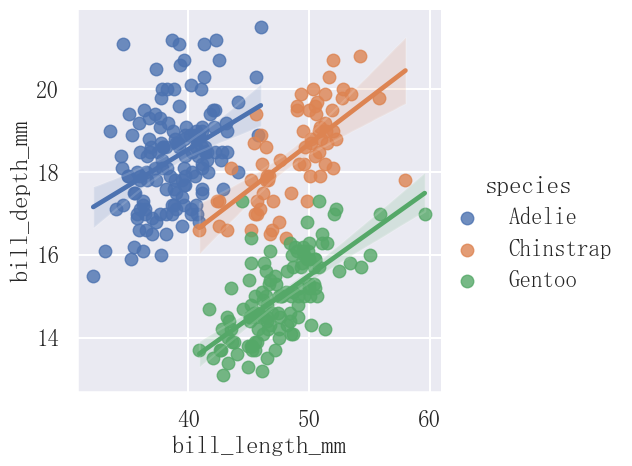

In [49]:
# reg plotとの違いはrow, columnが設定できること
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

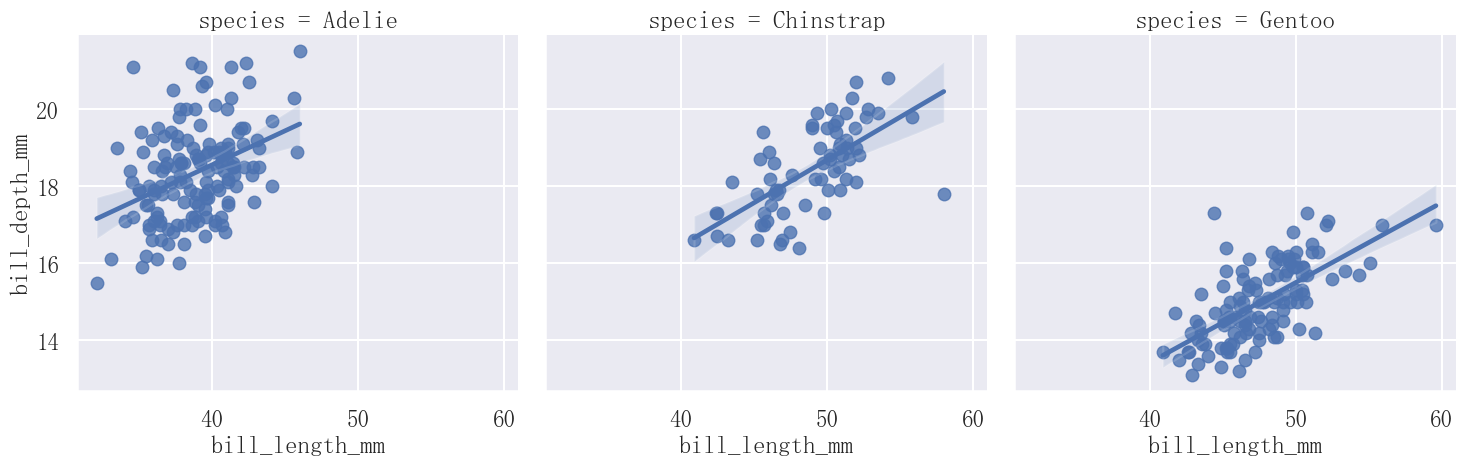

In [50]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', col='species')
plt.show()

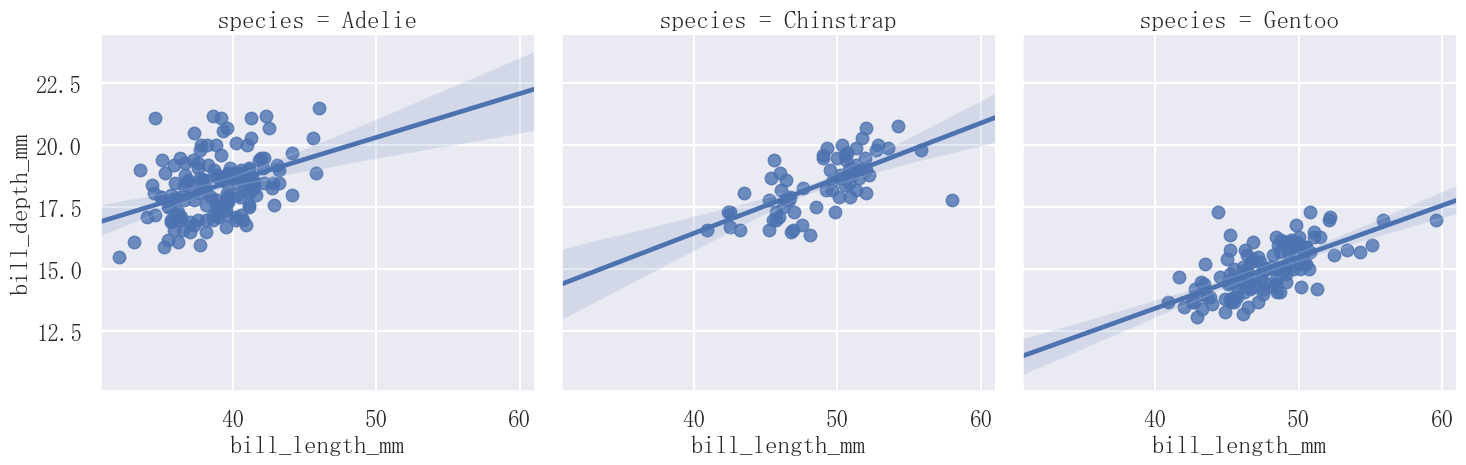

In [51]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', col='species', truncate=False)
plt.show()

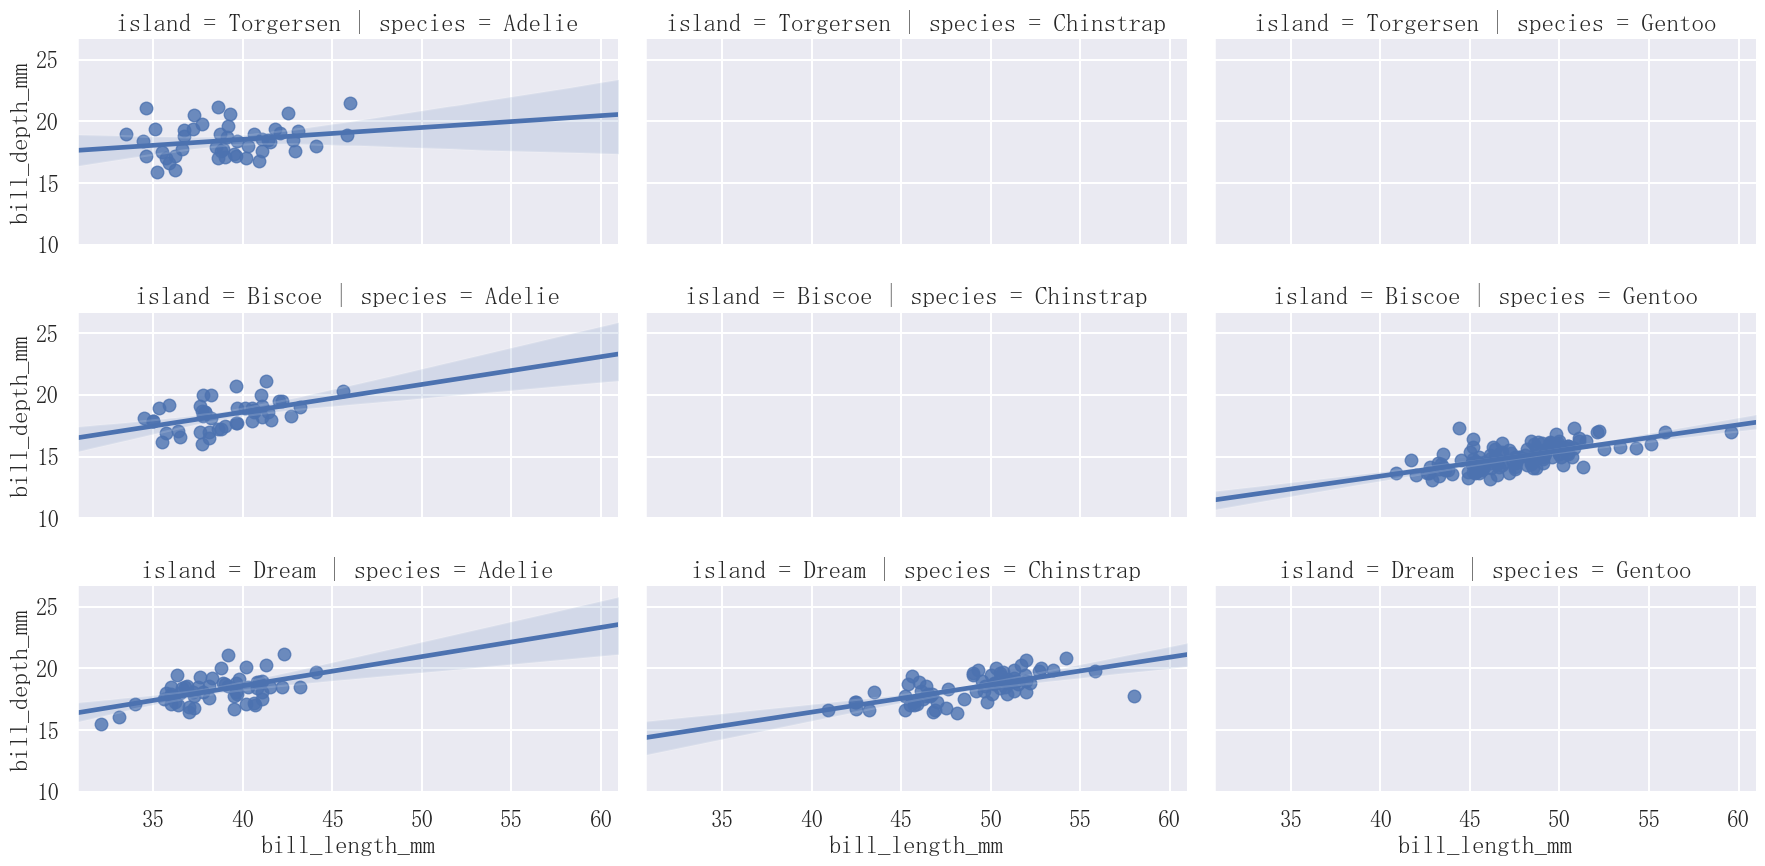

In [52]:
# row指定
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm',
    col='species', row='island', truncate=False, height=3, aspect=2)
plt.show()

## ラインプロット

In [53]:
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [54]:
flights.shape

(144, 3)

In [55]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


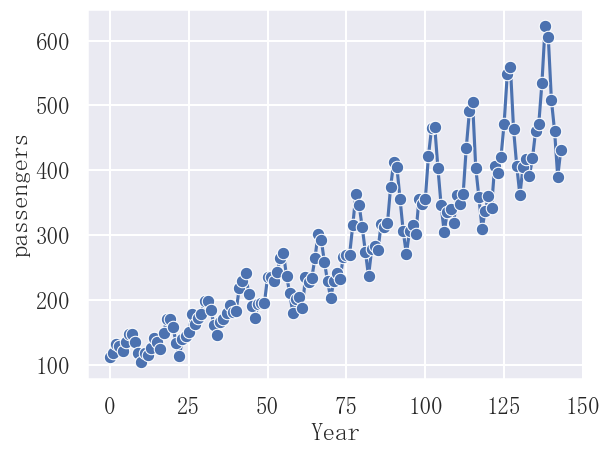

In [58]:
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='o')
plt.xlabel('Year')
plt.show()

In [59]:
idx = np.arange(0, 144, 12)
years = np.arange(1949, 1961)

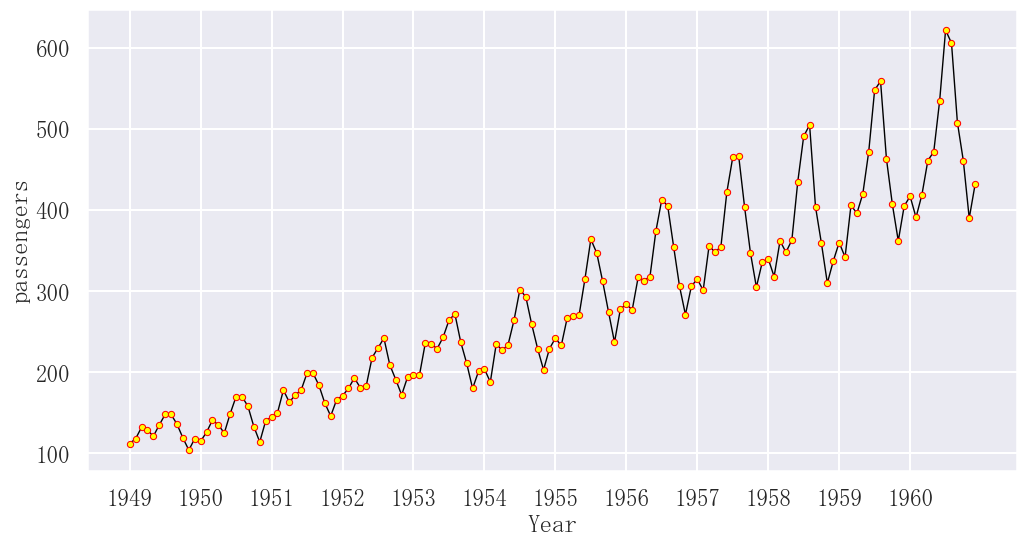

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='.',
    linewidth=1, markerfacecolor='yellow', markeredgecolor='red', color='black')
plt.xlabel('Year')
plt.xticks(idx, years)
plt.show()

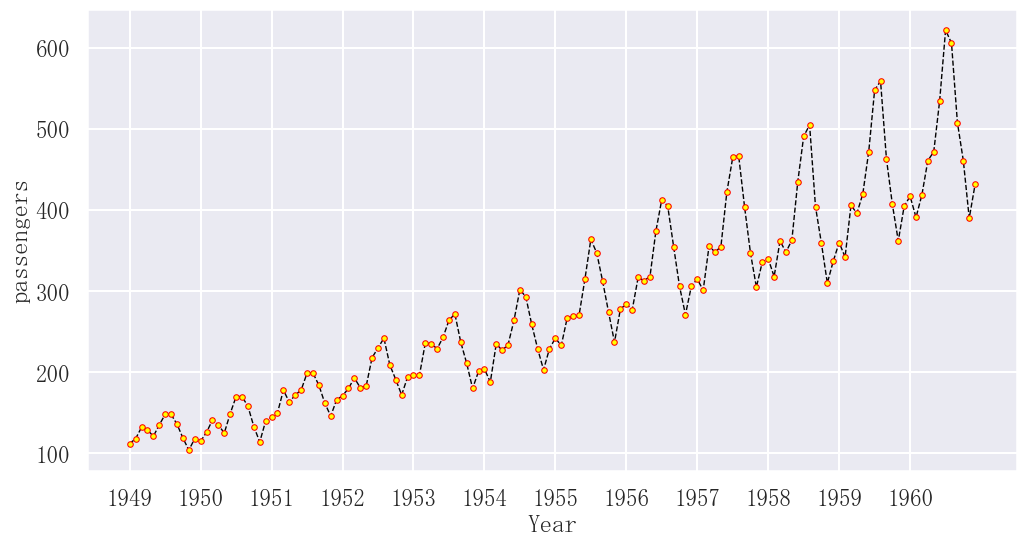

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='.',
    linewidth=1, markerfacecolor='yellow', markeredgecolor='red',
    linestyle='--', markersize=8, color='black')
plt.xlabel('Year')
plt.xticks(idx, years)
plt.show()

## オブジェクト指向型

(<Figure size 1000x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

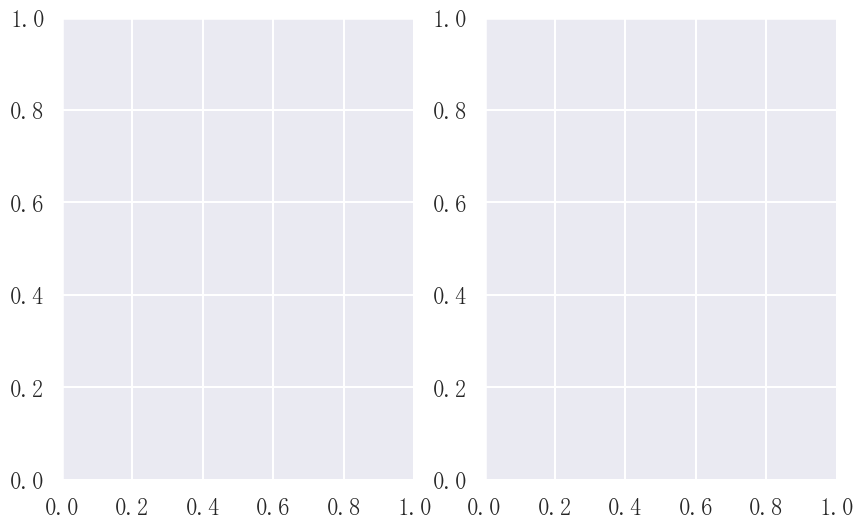

In [67]:
plt.subplots(1, 2, figsize=(10, 6))

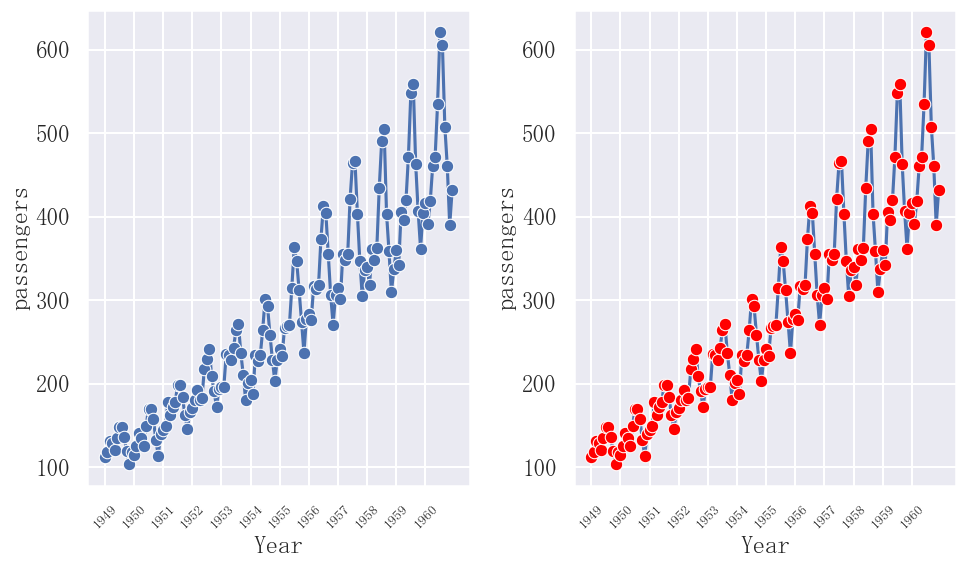

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), tight_layout=True)
sns.lineplot(data=flights, x=flights.index, y='passengers', marker='o', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_xticks(idx)
axes[0].set_xticklabels(years, rotation=45, size=10)

sns.lineplot(data=flights, x=flights.index, y='passengers', marker='o', ax=axes[1], markerfacecolor='red')
axes[1].set_xlabel('Year')
axes[1].set_xticks(idx)
axes[1].set_xticklabels(years, rotation=45, size=10)
plt.show()

In [81]:
flights_jj = flights[flights['month'].isin(['Jan', 'Jul'])].reset_index()
flights_jj.head()

index  year month  passengers
0      0  1949   Jan         112
1      6  1949   Jul         148
2     12  1950   Jan         115
3     18  1950   Jul         170
4     24  1951   Jan         145

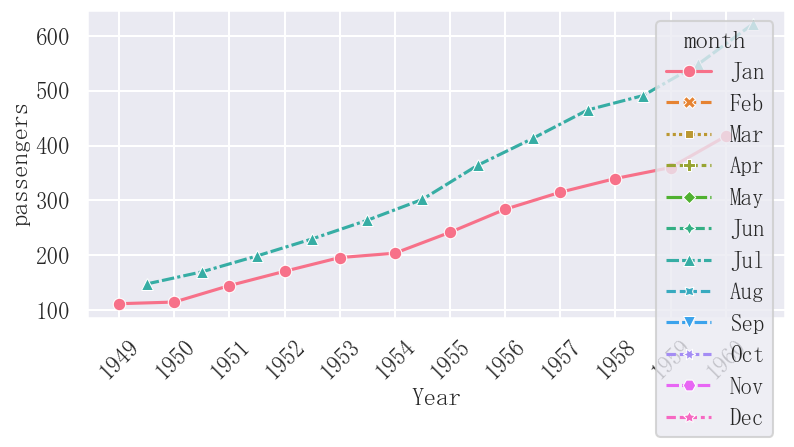

In [87]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=flights_jj, x=flights_jj.index, y='passengers', hue='month',
    style='month', markers=True)
plt.xlabel('Year')
plt.xticks(np.arange(0, 24, 2), np.arange(1949, 1961), rotation=45)
plt.show()

In [88]:
flights_jj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       24 non-null     int64   
 1   year        24 non-null     int64   
 2   month       24 non-null     category
 3   passengers  24 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 1.1 KB


In [89]:
# Categoryを変更
flights_jj['month'] = flights_jj['month'].astype(object)

In [91]:
flights_jj.dtypes

index          int64
year           int64
month         object
passengers     int64
dtype: object

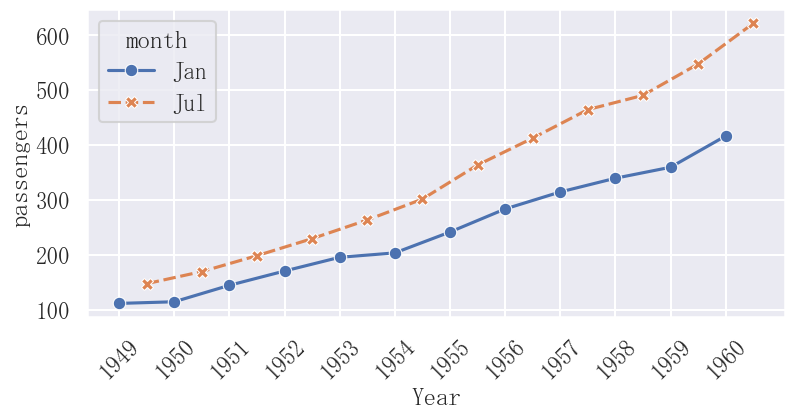

In [92]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=flights_jj, x=flights_jj.index, y='passengers', hue='month',
    style='month', markers=True)
plt.xlabel('Year')
plt.xticks(np.arange(0, 24, 2), np.arange(1949, 1961), rotation=45)
plt.show()

## DateTimeについて

In [93]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [94]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [95]:
flights['month'].map(month_dict) # このようにmapを使って一括で変更できる

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: month, Length: 144, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [96]:
# series作成
s = flights['month'].map(month_dict).astype(int)[:12]
s

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

In [97]:
s.map(lambda value: value * 2) # lambda式で1を足す例

0      2
1      4
2      6
3      8
4     10
5     12
6     14
7     16
8     18
9     20
10    22
11    24
Name: month, dtype: int64

In [98]:
flights['month_n'] = flights['month'].map(month_dict)
flights.head()

year month  passengers month_n
0  1949   Jan         112       1
1  1949   Feb         118       2
2  1949   Mar         132       3
3  1949   Apr         129       4
4  1949   May         121       5

In [99]:
flights['year'].map(lambda x: str(x) + '/')

0      1949/
1      1949/
2      1949/
3      1949/
4      1949/
       ...  
139    1960/
140    1960/
141    1960/
142    1960/
143    1960/
Name: year, Length: 144, dtype: object

In [101]:
flights['year_n_month'] = flights['year'].map(lambda x: str(x) + '/') + flights['month_n'].astype(str)
flights.head()

year month  passengers month_n year_n_month
0  1949   Jan         112       1       1949/1
1  1949   Feb         118       2       1949/2
2  1949   Mar         132       3       1949/3
3  1949   Apr         129       4       1949/4
4  1949   May         121       5       1949/5

In [105]:
# year_n_monthをDateTimeに変換
flights['date'] = pd.to_datetime(flights['year_n_month'])

C:\Users\masuda.yuya\AppData\Local\Temp\ipykernel_31284\1522727688.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flights['date'] = pd.to_datetime(flights['year_n_month'])


In [106]:
flights.head()

year month  passengers month_n year_n_month       date
0  1949   Jan         112       1       1949/1 1949-01-01
1  1949   Feb         118       2       1949/2 1949-02-01
2  1949   Mar         132       3       1949/3 1949-03-01
3  1949   Apr         129       4       1949/4 1949-04-01
4  1949   May         121       5       1949/5 1949-05-01

In [107]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          144 non-null    int64         
 1   month         144 non-null    category      
 2   passengers    144 non-null    int64         
 3   month_n       144 non-null    category      
 4   year_n_month  144 non-null    object        
 5   date          144 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ KB


In [109]:
# 年取得
flights['date'].dt.year

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: date, Length: 144, dtype: int32

In [110]:
# 曜日取得
flights['date'].dt.day_name()

0      Saturday
1       Tuesday
2       Tuesday
3        Friday
4        Sunday
         ...   
139      Monday
140    Thursday
141    Saturday
142     Tuesday
143    Thursday
Name: date, Length: 144, dtype: object

In [111]:
one_day = pd.Timestamp('1994/07/05')
one_day

Timestamp('1994-07-05 00:00:00')

In [114]:
# 日数の差
flights['days_left'] = flights['date'].map(lambda x:one_day - x)
flights.head()

year month  passengers month_n year_n_month       date  days_left
0  1949   Jan         112       1       1949/1 1949-01-01 16621 days
1  1949   Feb         118       2       1949/2 1949-02-01 16590 days
2  1949   Mar         132       3       1949/3 1949-03-01 16562 days
3  1949   Apr         129       4       1949/4 1949-04-01 16531 days
4  1949   May         121       5       1949/5 1949-05-01 16501 days

In [115]:
flights.set_index('date', inplace=True)
flights.head()

year month  passengers month_n year_n_month  days_left
date                                                              
1949-01-01  1949   Jan         112       1       1949/1 16621 days
1949-02-01  1949   Feb         118       2       1949/2 16590 days
1949-03-01  1949   Mar         132       3       1949/3 16562 days
1949-04-01  1949   Apr         129       4       1949/4 16531 days
1949-05-01  1949   May         121       5       1949/5 16501 days

In [116]:
flights.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)

In [119]:
# DateTimeIndexの利用
flights.loc['1949'] # DateTimeIndexで1949年のみ抽出

year month  passengers month_n year_n_month  days_left
date                                                              
1949-01-01  1949   Jan         112       1       1949/1 16621 days
1949-02-01  1949   Feb         118       2       1949/2 16590 days
1949-03-01  1949   Mar         132       3       1949/3 16562 days
1949-04-01  1949   Apr         129       4       1949/4 16531 days
1949-05-01  1949   May         121       5       1949/5 16501 days
1949-06-01  1949   Jun         135       6       1949/6 16470 days
1949-07-01  1949   Jul         148       7       1949/7 16440 days
1949-08-01  1949   Aug         148       8       1949/8 16409 days
1949-09-01  1949   Sep         136       9       1949/9 16378 days
1949-10-01  1949   Oct         119      10      1949/10 16348 days
1949-11-01  1949   Nov         104      11      1949/11 16317 days
1949-12-01  1949   Dec         118      12      1949/12 16287 days

In [123]:
flights.resample('YE')

In [122]:
flights.resample('YE')['passengers']

In [124]:
flights.resample('YE')['passengers'].mean() # 各年度の平均値を算出

date
1949-12-31    126.666667
1950-12-31    139.666667
1951-12-31    170.166667
1952-12-31    197.000000
1953-12-31    225.000000
1954-12-31    238.916667
1955-12-31    284.000000
1956-12-31    328.250000
1957-12-31    368.416667
1958-12-31    381.000000
1959-12-31    428.333333
1960-12-31    476.166667
Freq: YE-DEC, Name: passengers, dtype: float64

In [126]:
ser_prev_month = flights['passengers'].shift(1)
ser_prev_month

date
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: passengers, Length: 144, dtype: float64

In [127]:
flights['prev_month_passengers'] = flights['passengers'].shift(1)
flights.head()

year month  passengers month_n year_n_month  days_left  \
date                                                                 
1949-01-01  1949   Jan         112       1       1949/1 16621 days   
1949-02-01  1949   Feb         118       2       1949/2 16590 days   
1949-03-01  1949   Mar         132       3       1949/3 16562 days   
1949-04-01  1949   Apr         129       4       1949/4 16531 days   
1949-05-01  1949   May         121       5       1949/5 16501 days   

            prev_month_passengers  
date                               
1949-01-01                    NaN  
1949-02-01                  112.0  
1949-03-01                  118.0  
1949-04-01                  132.0  
1949-05-01                  129.0

In [128]:
# 先月との差を追加
flights['difference'] = flights['passengers'] - flights['prev_month_passengers']
flights.head()

year month  passengers month_n year_n_month  days_left  \
date                                                                 
1949-01-01  1949   Jan         112       1       1949/1 16621 days   
1949-02-01  1949   Feb         118       2       1949/2 16590 days   
1949-03-01  1949   Mar         132       3       1949/3 16562 days   
1949-04-01  1949   Apr         129       4       1949/4 16531 days   
1949-05-01  1949   May         121       5       1949/5 16501 days   

            prev_month_passengers  difference  
date                                           
1949-01-01                    NaN         NaN  
1949-02-01                  112.0         6.0  
1949-03-01                  118.0        14.0  
1949-04-01                  132.0        -3.0  
1949-05-01                  129.0        -8.0